In [1]:
# Import necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from raphtory import Graph

class ContactSequenceDiagram:
    def __init__(self, graph, earliest_time=None, latest_time=None, figsize=(12, 5), save_file=False, filename='Contact_Sequence.PNG'):
        self.graph = graph
        # Control file saving
        self.save_file = save_file
        # Set earliest_time and latest_time from graph if not provided
        if earliest_time is None:
            self.earliest_time = graph.earliest_time
        else:
            self.earliest_time = earliest_time
        if latest_time is None:
            self.latest_time = graph.latest_time
        else:
            self.latest_time = latest_time
        # Set a size of the diagram
        self.figsize = figsize
        # Name of the file, the user may change name and format of the file
        self.filename = filename
        # Choose a colour for a node using custom_palette
        self.node_colours = self.generate_colours()
        # Get indexes of nodes in graph
        self.y_positions = {node.name: i for i, node in enumerate(graph.vertices)}

    def generate_colours(self):
        """ 
        Generate random distinct colors for each node using custom_palette.
        """
        custom_palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                          '#ea476f', '#2f8d3b', '#fee74c', '#2748c0', '#f79f61',
                          '#b129db', '#75f3f3', '#f361eb', '#97c707', '#f68e8e']
        return {node.name: custom_palette[i % len(custom_palette)] for i, node in enumerate(self.graph.vertices)}

    def plot_horizontal_line(self, node):
        """
        Plot a horizontal line for the node at the given y_position using the node's colour.
        """
        plt.hlines(self.y_positions[node], xmin=(self.earliest_time - 0.75), xmax=self.latest_time, 
                   colors=self.node_colours[node], linestyles='solid', lw=3.5, alpha=0.4)

    def plot_interaction(self, source, target, timestamps):
        """
        Plot an edge with a dot and a connecting line.
        edge.src and edge.dst are the node labels, time is the x position.
        All lines representing edges are in black colour.
        """
        for time in timestamps:
            # Plot a dot for the source node
            plt.plot(time, self.y_positions[source], 'o', color=self.node_colours[source], markersize=10)
            # Plot a dot for the target if different from the source
            if source != target:
                plt.plot(time, self.y_positions[target], 'o', color=self.node_colours[target], markersize=10)
                # Calculate the arc's lenght/height based on source and target positions
                arc_height = -0.2 if self.y_positions[source] < self.y_positions[target] else 0.2
                # Create a patch for the arc
                arc = mpatches.FancyArrowPatch((time, self.y_positions[source]), (time, self.y_positions[target]), 
                                                   connectionstyle=f"arc3,rad={arc_height}", color='black', lw=1)
                # Plot the arcs
                plt.gca().add_patch(arc)

    def setup_plot(self):
        """
        Initialize the plot with labels, axes, etc.
        """
        # Set a size of the diagram
        plt.figure(figsize=self.figsize)
        # Set a label on the x-axis
        plt.xlabel('Time')
        # Set the title
        plt.title('Schematic Contact Sequence')
        # Get rid of lines on the x-axis points
        plt.grid(False)

    def finalize_plot(self, ):
        """
        Display the plot and if fancy, save it to a file.
        """
        # Set the y-ticks to node labels
        plt.yticks(range(len(self.graph.vertices)), list(self.graph.vertices.name))
        # Set the x-axis limits to start from the minimum interaction time
        plt.xlim(self.earliest_time - 0.5, self.latest_time + 0.02)
        # Set the y-axis limits to include all nodes
        plt.ylim(-1, len(self.graph.vertices))
        plt.tight_layout()
        # Saves the plot as a file only if save_file is True
        if self.save_file:
            plt.savefig(self.filename)
        # Saves the plot as a file only if save_file is True
        if self.save_file:
            try:
                plt.savefig(self.filename)
                print(f"Diagram saved as {self.filename}")
            except Exception as e:
                print(f"Error saving file: {e}")
        # Display the diagram
        plt.show()

    def create_diagram(self, save_file=False):
        # Set up a save_file flag for finalize_plot() function
        if save_file is not False:
            self.save_file = save_file
        self.setup_plot()
        # Iterate over all vertices with their name
        for node in self.graph.vertices:
            self.plot_horizontal_line(node.name)
        # Iterate over edges with their full history of timestamps
        for edge in self.graph.edges:
            self.plot_interaction(edge.src.name, edge.dst.name, edge.history())
        self.finalize_plot()

In [2]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_3"

# Load the file
if os.path.isfile(binecode_path):
    g3 = Graph.load_from_file(binecode_path)
    print(g3)
else:
    print(f"File does not exist: {binecode_path}")

Graph(number_of_edges=97252, number_of_vertices=26533, number_of_temporal_edges=159288593, earliest_time="7200000", latest_time="10799999")


In [27]:
from raphtory import algorithms as rp
from raphtory import Graph

start_time = 7800000 # Minute 130
end_time = 7800000 + 50 # Minute 132

g_no_spike = g3.window(start_time, end_time)

print(g_no_spike)

Graph(number_of_edges=458, number_of_vertices=379, number_of_temporal_edges=2225, earliest_time="7800000", latest_time="7800049")


In [28]:
from raphtory import algorithms as rp
# usage in the function call
balance_result = rp.degree_centrality(g_no_spike, threads=3)

top_20 = balance_result.top_k(20)
for rank, (name,score) in enumerate(top_20, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

Rank 1: USER with a score of 1.00000
Rank 2: MS_37691 with a score of 0.29333
Rank 3: MS_51052 with a score of 0.21333
Rank 4: MS_27421 with a score of 0.20000
Rank 5: MS_19585 with a score of 0.14667
Rank 6: MS_30234 with a score of 0.12000
Rank 7: MS_52363 with a score of 0.10667
Rank 8: MS_2827 with a score of 0.10667
Rank 9: MS_29083 with a score of 0.10667
Rank 10: MS_23205 with a score of 0.10667
Rank 11: MS_63670 with a score of 0.10667
Rank 12: MS_20664 with a score of 0.09333
Rank 13: MS_28617 with a score of 0.09333
Rank 14: MS_43781 with a score of 0.09333
Rank 15: MS_15934 with a score of 0.08000
Rank 16: MS_9638 with a score of 0.08000
Rank 17: MS_5122 with a score of 0.08000
Rank 18: MS_14728 with a score of 0.08000
Rank 19: MS_2842 with a score of 0.08000
Rank 20: MS_19279 with a score of 0.08000


In [31]:
list_of_names = []
for name,score in top_20:
    list_of_names.append(name)
subgraph = g3.subgraph(list_of_names)
print(subgraph)

Graph(number_of_edges=47, number_of_vertices=20, number_of_temporal_edges=12005729, earliest_time="7200000", latest_time="10799999")


In [32]:
start_time = 7800000 # Minute 130
end_time = 7800000 + 50 # Minute 132

subgraph = subgraph.window(start_time, end_time)

print(subgraph)

Graph(number_of_edges=27, number_of_vertices=20, number_of_temporal_edges=208, earliest_time="7800000", latest_time="7800049")


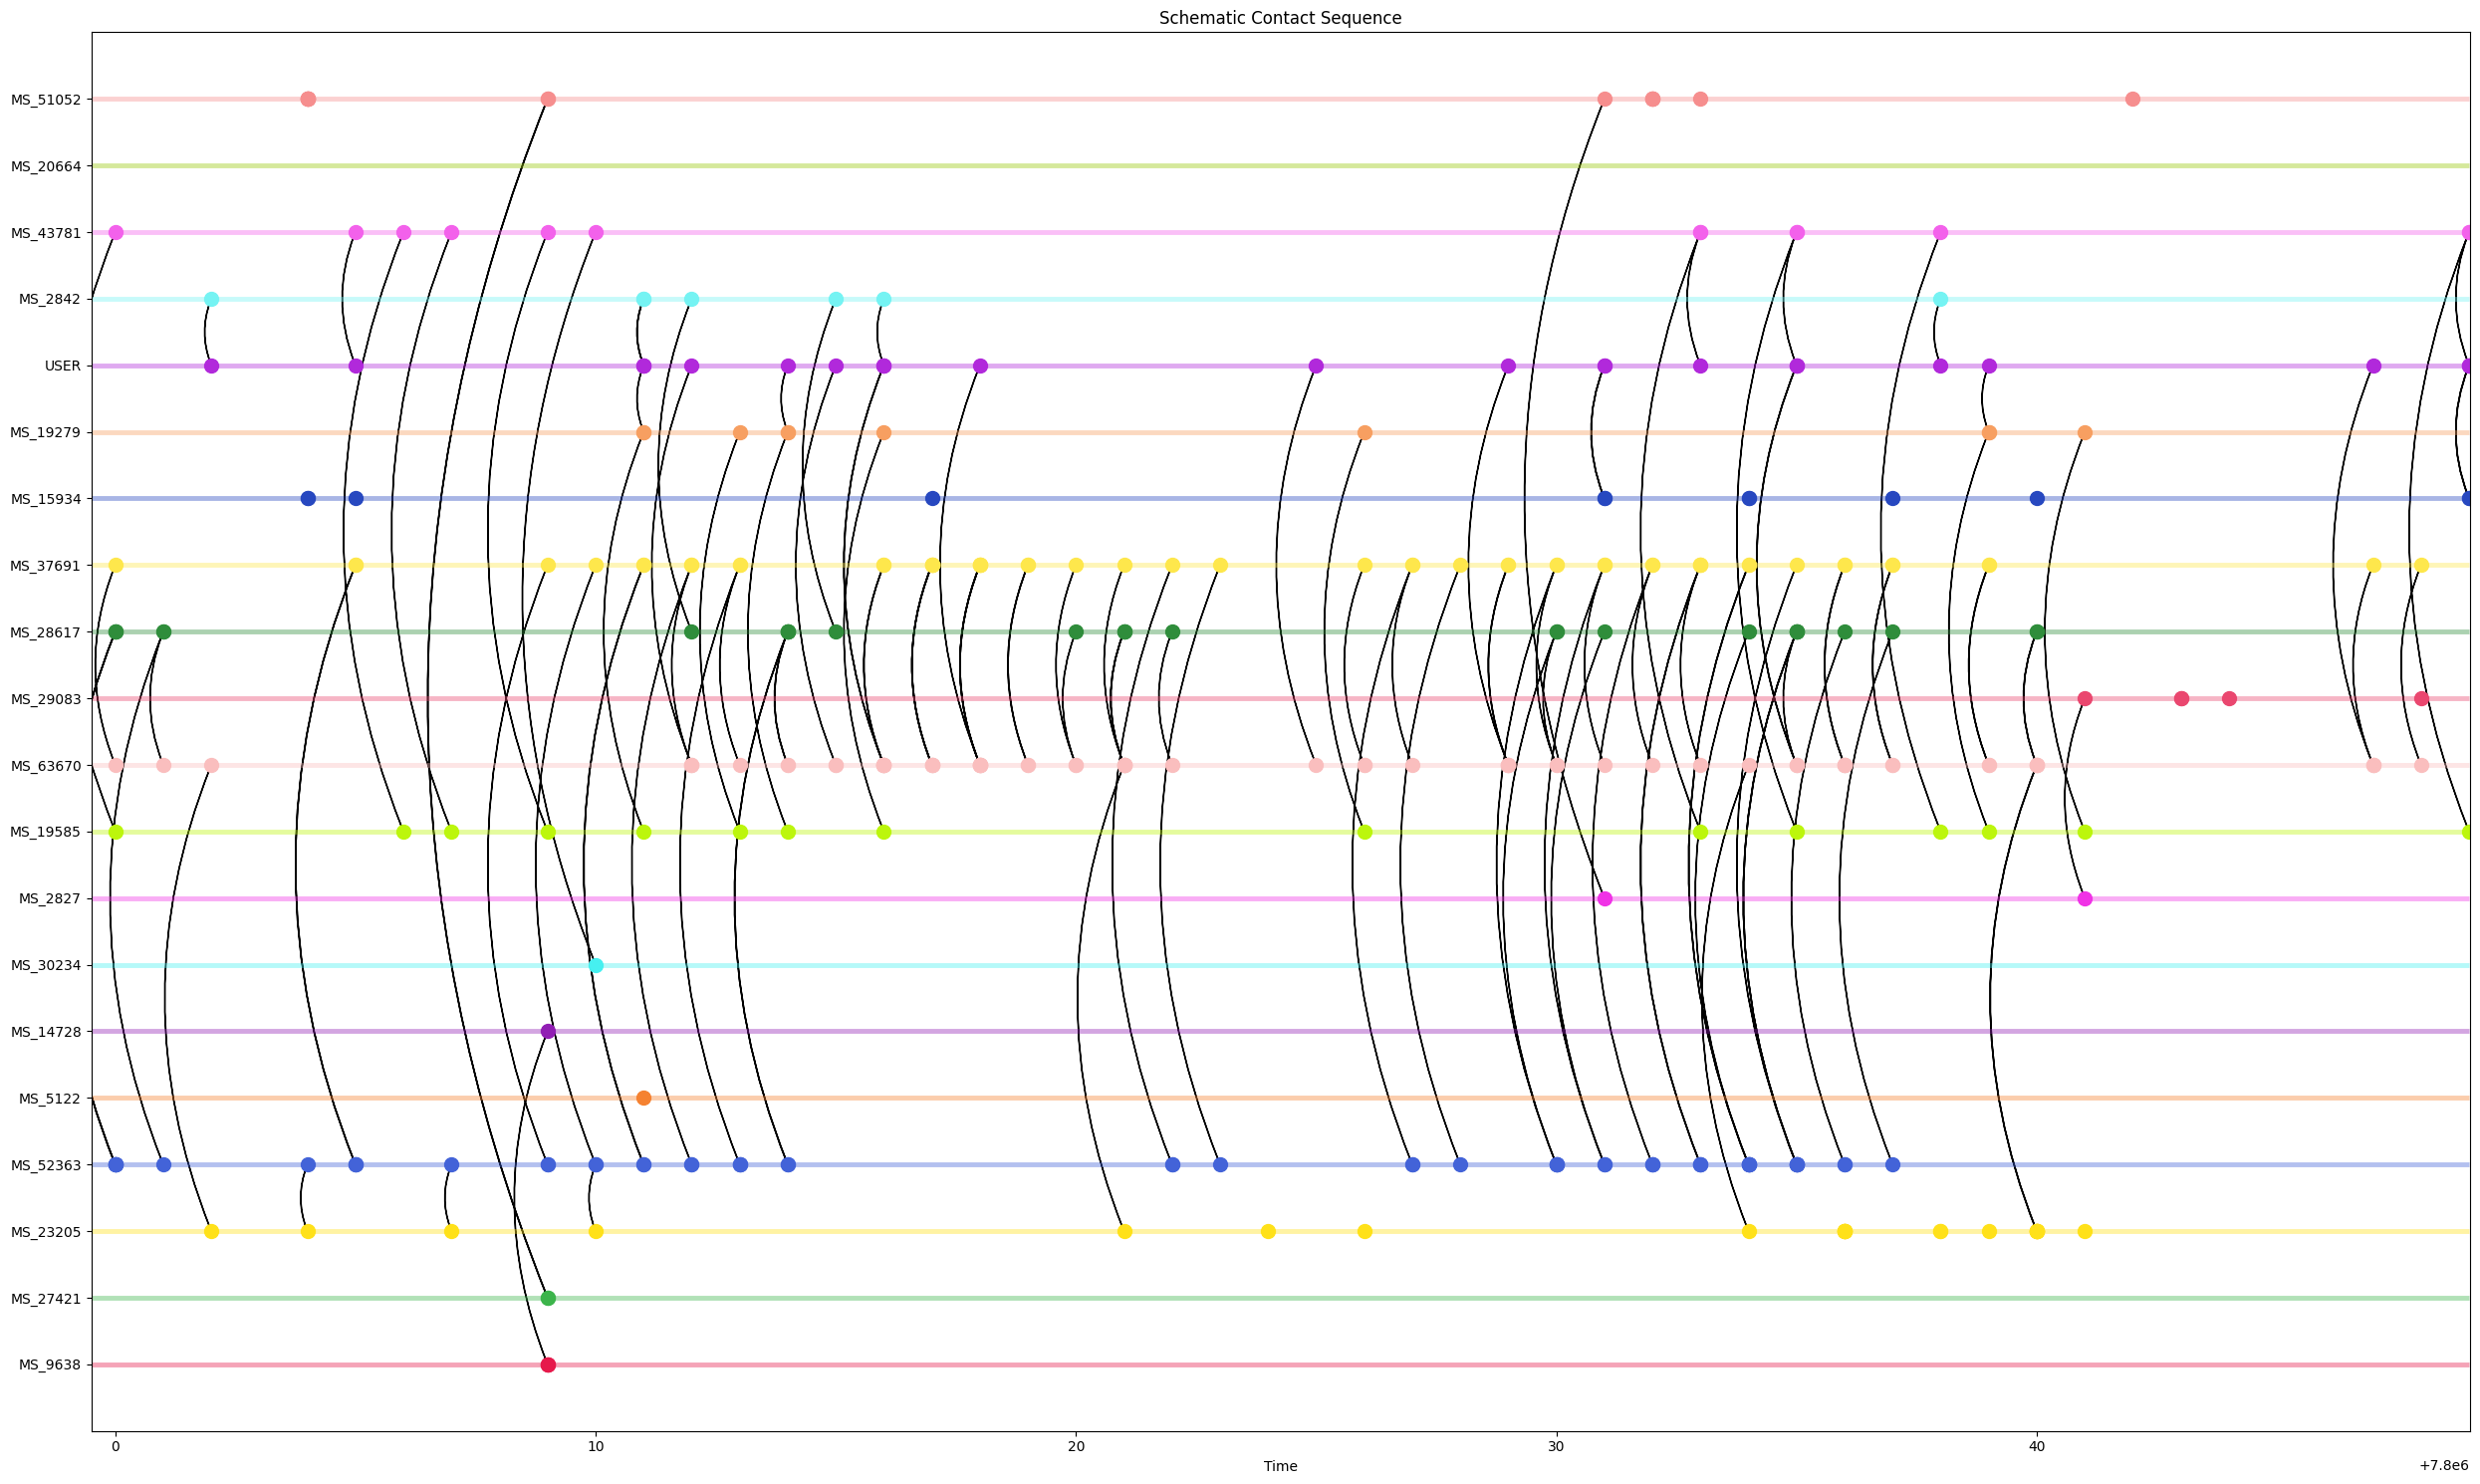

In [33]:
diagram = ContactSequenceDiagram(subgraph,  earliest_time=subgraph.earliest_time, figsize=(25, 15))
diagram.create_diagram()

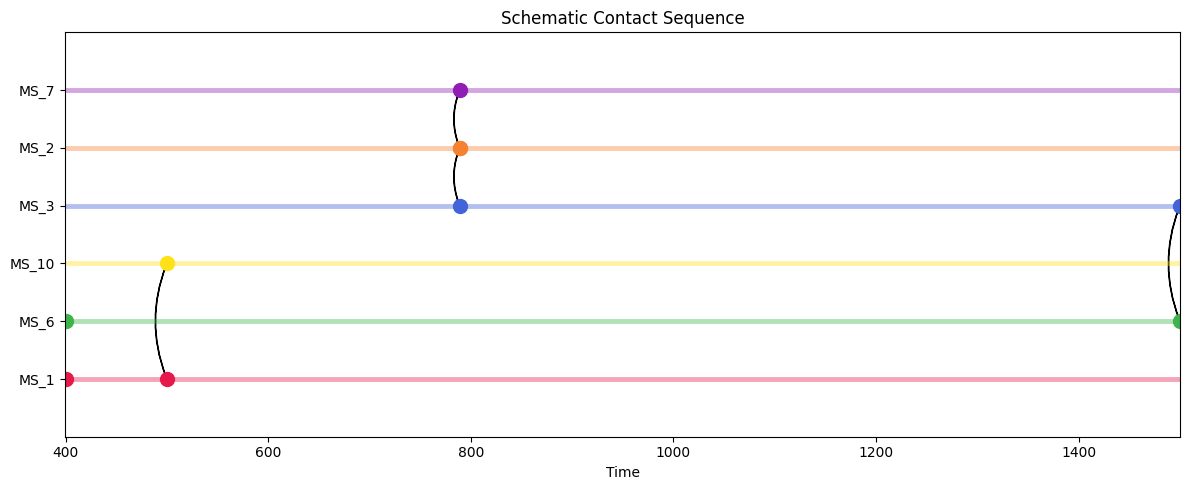

In [34]:
# Mock data
from raphtory import Graph

g = Graph()

g.add_edge(timestamp=400, src="MS_1", dst="MS_6")
g.add_edge(timestamp=500, src="MS_10", dst="MS_1")
g.add_edge(timestamp=789, src="MS_3", dst="MS_2")
g.add_edge(timestamp=789, src="MS_2", dst="MS_7")
g.add_edge(timestamp=1500, src="MS_6", dst="MS_3")

# Example usage
diagram = ContactSequenceDiagram(g)
diagram.create_diagram()